In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#### Se importa iForest de sklearn

In [15]:
from sklearn.ensemble import IsolationForest

## Datos Anomalos

Dato que se sale la normlidad    
en ocasiones es deseable quitarlos debido a que causan sesgo dentro de las conclusiones de un analisis o sesgo en un modelo de ML    
En ocasiones se quiere encontrar el dato anomalo por que brinda informacion muy valiosa (transferencia bancaria anomalo)    

Existen diferentes tecnicas para encontrarlos 

## Bosques de Aislamiento 
Cada bosque se basa en un conjunto de multiples arboles de aislamiento iTree's    
* Como se crean los iTree? Se hacen cortes aleatorios, definiendo umbrales y dividiendo los datos, así sucesivamente   
Un dato facilmente separable queda en la parte superior del arbol y por lo tanto se consideran anomalos     
Para evitar errores se crean multiples arboles de aislamiento    
Datos normales : ramas largas   
Datos anómalos en ramas cortar

Se condisera un __umbral__ que se conoce como __nivel de contaminacion__

In [16]:
ruta = r'C:\Users\USUARIO\Documents\Python Scripts\ML\Scripts\DATA_TOOLS\Datos Anomalos iTrees\carros_usados.csv'
ruta =  ruta.replace(os.sep,'/')

datos_autos =  np.loadtxt(ruta, delimiter=',')

In [19]:
datos_autos

array([[0.0373, 1.    ],
       [0.0801, 0.9025],
       [0.1405, 0.574 ],
       [0.1775, 0.7396],
       [0.1627, 0.6292],
       [0.1553, 0.6623],
       [0.1997, 0.6071],
       [0.2145, 0.6954],
       [0.1258, 0.7837],
       [0.1405, 0.7727],
       [0.2885, 0.1325],
       [0.2515, 0.1876],
       [0.2737, 0.1601],
       [0.3107, 0.298 ],
       [0.2959, 0.3311],
       [0.2885, 0.276 ],
       [0.0333, 0.6623],
       [0.1483, 0.8884],
       [0.152 , 0.2266],
       [0.4364, 0.3532],
       [0.4216, 0.3863],
       [0.429 , 0.3643],
       [0.1525, 0.9515],
       [0.1715, 0.803 ],
       [0.1775, 0.5795],
       [0.1925, 0.1936],
       [0.1987, 0.3687],
       [0.1987, 0.3687],
       [0.2085, 0.4801],
       [0.2086, 0.2562],
       [0.2466, 0.3978],
       [0.2466, 0.3978],
       [0.302 , 0.8252],
       [0.3152, 0.1329],
       [0.3429, 0.4169],
       [0.35  , 0.1613],
       [0.35  , 0.1613],
       [0.3924, 0.4877],
       [0.2466, 0.3978],
       [0.2466, 0.3978],


In [17]:
## Vector numpy para almacenar resultados de los modelos de IsolationForest
## da 1 si es normal y -1 si es anómalo

resultados = np.zeros((3, datos_autos.size//2))

#### Bosques de Aislamiento con diferente contaminacion 

In [24]:
c = [0.00000001, 0.05, 0.1] ## o datos anomalos, 5 porciento y 10 porcinento de datos anomalos 
for i in range(len(c)):
    modelo = IsolationForest(contamination=c[i]).fit(datos_autos)
    resultados[i] = modelo.predict(datos_autos)

#### Grafica datos anomalos

<Figure size 640x480 with 0 Axes>

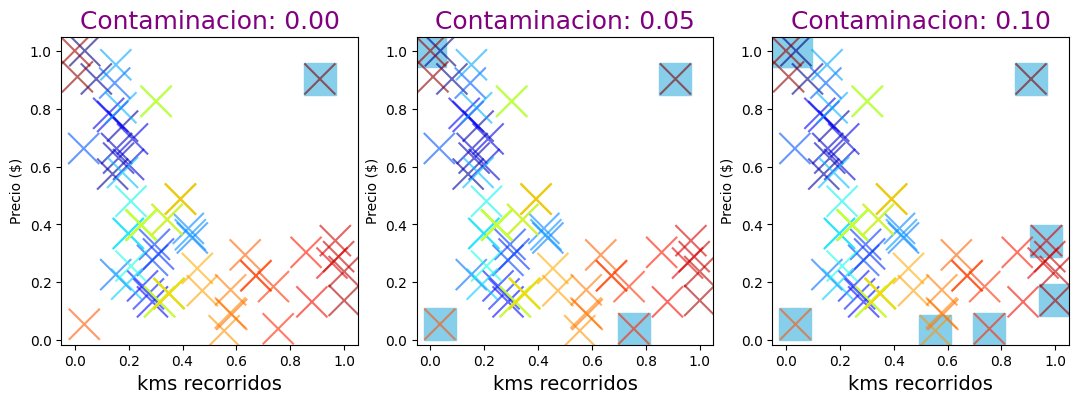

In [28]:
plt.set_cmap('jet')
fig = plt. figure(figsize=(13,4))

for i in range(len(c)):
    ax= fig.add_subplot(1, 3, i+1)
    ax.scatter(datos_autos[resultados[i]==-1][:,0], datos_autos[resultados[i]==-1][:,1], c='skyblue', marker='s', s=500)
    
    ax.scatter(datos_autos[:,0], datos_autos[:,1], c = range(datos_autos.size//2), marker='x',s=500, alpha=0.6)
    ax.set_title('Contaminacion: %0.2f' % c[i], size=18, color='purple')
    ax.set_ylabel('Precio ($)', size= 10)
    ax.set_xlabel('kms recorridos', size= 14)

plt.show()